<a href="https://colab.research.google.com/github/sramakrishnan247/jubilant-adventure/blob/main/COCOLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
# !wget http://images.cocodataset.org/zips/val2017.zip

In [3]:
# !unzip val2017.zip

In [4]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-06-16 22:29:35--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.137.169
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.137.169|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  83.0MB/s    in 2.9s    

2021-06-16 22:29:38 (83.0 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [5]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [6]:
annFile='./annotations/instances_val2017.json'

In [7]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


In [8]:

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
vehicle outdoor kitchen animal indoor electronic food person accessory furniture appliance sports


In [10]:
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds )
print(len(imgIds))
img = coco.loadImgs(imgIds)[58]
print("imgIds: ", imgIds)
print("images: ", img)


2693
imgIds:  [532481, 458755, 385029, 311303, 393226, 532493, 8211, 327701, 188439, 434204, 401446, 213033, 466986, 213035, 319534, 516143, 32817, 532530, 188465, 434230, 475191, 254016, 131138, 16451, 81988, 376900, 507975, 434247, 204871, 516173, 122962, 98392, 442456, 32861, 213086, 442463, 311392, 311394, 49259, 221291, 442480, 368752, 319607, 417911, 32887, 450686, 32901, 270474, 139, 180383, 82085, 385190, 524456, 90284, 32941, 188592, 229553, 278705, 213171, 336053, 549055, 114884, 508101, 65736, 303305, 344268, 532690, 360661, 16598, 73946, 114907, 426203, 278749, 516318, 229601, 295138, 467176, 319721, 352491, 33005, 458992, 475387, 393469, 57597, 426241, 540932, 106757, 65798, 180487, 213255, 147725, 418062, 147729, 377113, 229659, 147740, 426268, 434459, 205105, 565563, 278848, 368961, 352582, 57672, 74058, 123213, 33104, 336209, 180560, 483667, 8532, 270677, 262487, 491867, 475484, 393569, 549220, 336232, 74092, 467315, 131444, 434548, 532855, 442746, 541055, 426376, 33626

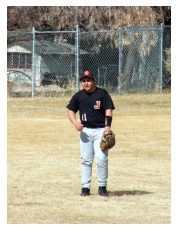

In [11]:

# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

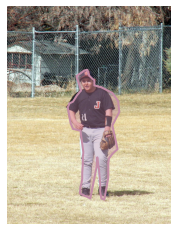

In [12]:

# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

[{'segmentation': [[166.67, 429.33, 168.0, 413.33, 169.33, 410.67, 172.0, 396.0, 172.0, 382.67, 173.33, 362.67, 173.33, 345.33, 174.67, 336.0, 168.0, 285.33, 150.67, 281.33, 145.33, 268.0, 138.67, 232.0, 142.67, 222.67, 150.67, 218.67, 160.0, 204.0, 166.67, 196.0, 169.33, 193.33, 158.67, 160.0, 168.0, 153.33, 177.33, 146.67, 184.0, 145.33, 188.0, 158.67, 194.67, 165.33, 200.0, 169.33, 200.0, 181.33, 216.0, 185.33, 241.33, 198.67, 254.67, 217.33, 257.33, 242.67, 241.33, 273.33, 253.33, 328.0, 242.67, 337.33, 233.33, 349.33, 232.0, 361.33, 232.0, 377.33, 232.0, 393.33, 224.0, 437.33, 222.67, 444.0, 216.0, 441.33, 213.33, 425.33, 213.33, 408.0, 210.67, 376.0, 206.67, 346.67, 205.33, 368.0, 190.67, 441.33, 190.67, 441.33, 190.67, 441.33]], 'area': 19874.0, 'iscrowd': 0, 'image_id': 213171, 'bbox': [138.67, 145.33, 118.66, 298.67], 'category_id': 1, 'id': 432019}]


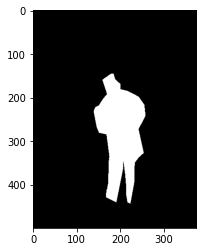

In [13]:
print(anns)
mask = coco.annToMask(anns[0])
item = set()
for row in mask:
  for col in row:
    item.add(col)
plt.imshow(mask,cmap='gray')

In [14]:
print(I.shape)
print(mask.shape)

(500, 375, 3)
(500, 375)


In [15]:
print(type(I))
print(type(mask))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


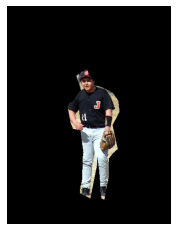

In [16]:
idx=(mask==0)
print(idx)
maskI = I.copy()
maskI[idx] = 0
plt.axis('off')
plt.imshow(maskI)
plt.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


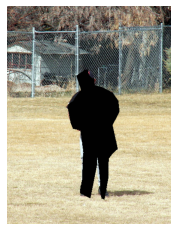

In [17]:
idx=(mask==1)
print(idx)
maskI = I.copy()
maskI[idx] = 1
plt.axis('off')
plt.imshow(maskI)
plt.show()